In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os
import tensorflow as tf

In [20]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [21]:
df_pre = pd.read_csv('../dataset/wine_train.csv', header=None)

print(df_pre.shape)
df_pre.head()

(5000, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.1,0.21,0.28,2.7,0.034,23.0,111.0,0.99405,3.35,0.64,10.2,4,0
1,6.5,0.22,0.29,7.4,0.028,16.0,87.0,0.99311,3.15,0.56,10.9,7,0
2,6.8,0.29,0.49,1.4,0.142,52.0,148.0,0.99370,3.08,0.49,9.0,6,0
3,7.4,0.24,0.40,4.3,0.032,9.0,95.0,0.99200,3.09,0.39,11.1,6,0
4,6.8,0.19,0.23,5.1,0.034,71.0,204.0,0.99420,3.23,0.69,10.1,5,0


In [22]:
# 피쳐, 타깃값 분리
dataset = df_pre.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [23]:
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [25]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)


In [26]:
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [27]:
# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [28]:
# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [29]:
history = model.fit(X, Y, validation_split=0.2, 
                  epochs=3500, 
                  batch_size=500, verbose=0, 
                  callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.54069, saving model to ./model/01-0.5407.hdf5

Epoch 2: val_loss improved from 0.54069 to 0.35177, saving model to ./model/02-0.3518.hdf5

Epoch 3: val_loss improved from 0.35177 to 0.32616, saving model to ./model/03-0.3262.hdf5

Epoch 4: val_loss improved from 0.32616 to 0.31237, saving model to ./model/04-0.3124.hdf5

Epoch 5: val_loss improved from 0.31237 to 0.29692, saving model to ./model/05-0.2969.hdf5

Epoch 6: val_loss improved from 0.29692 to 0.28252, saving model to ./model/06-0.2825.hdf5

Epoch 7: val_loss improved from 0.28252 to 0.26772, saving model to ./model/07-0.2677.hdf5

Epoch 8: val_loss improved from 0.26772 to 0.25227, saving model to ./model/08-0.2523.hdf5

Epoch 9: val_loss improved from 0.25227 to 0.23646, saving model to ./model/09-0.2365.hdf5

Epoch 10: val_loss improved from 0.23646 to 0.22307, saving model to ./model/10-0.2231.hdf5

Epoch 11: val_loss improved from 0.22307 to 0.21380, saving model to ./model/11-0.


Epoch 97: val_loss did not improve from 0.07314

Epoch 98: val_loss did not improve from 0.07314

Epoch 99: val_loss did not improve from 0.07314

Epoch 100: val_loss did not improve from 0.07314

Epoch 101: val_loss did not improve from 0.07314

Epoch 102: val_loss improved from 0.07314 to 0.06983, saving model to ./model/102-0.0698.hdf5

Epoch 103: val_loss improved from 0.06983 to 0.06910, saving model to ./model/103-0.0691.hdf5

Epoch 104: val_loss did not improve from 0.06910

Epoch 105: val_loss did not improve from 0.06910

Epoch 106: val_loss improved from 0.06910 to 0.06789, saving model to ./model/106-0.0679.hdf5

Epoch 107: val_loss did not improve from 0.06789

Epoch 108: val_loss did not improve from 0.06789

Epoch 109: val_loss did not improve from 0.06789

Epoch 110: val_loss did not improve from 0.06789

Epoch 111: val_loss improved from 0.06789 to 0.06605, saving model to ./model/111-0.0661.hdf5

Epoch 112: val_loss improved from 0.06605 to 0.06513, saving model to ./


Epoch 230: val_loss did not improve from 0.04806

Epoch 231: val_loss did not improve from 0.04806

Epoch 232: val_loss did not improve from 0.04806

Epoch 233: val_loss did not improve from 0.04806

Epoch 234: val_loss did not improve from 0.04806

Epoch 235: val_loss did not improve from 0.04806

Epoch 236: val_loss did not improve from 0.04806

Epoch 237: val_loss did not improve from 0.04806

Epoch 238: val_loss did not improve from 0.04806

Epoch 239: val_loss did not improve from 0.04806

Epoch 240: val_loss did not improve from 0.04806

Epoch 241: val_loss did not improve from 0.04806

Epoch 242: val_loss did not improve from 0.04806

Epoch 243: val_loss did not improve from 0.04806

Epoch 244: val_loss did not improve from 0.04806

Epoch 245: val_loss improved from 0.04806 to 0.04785, saving model to ./model/245-0.0479.hdf5

Epoch 246: val_loss did not improve from 0.04785

Epoch 247: val_loss did not improve from 0.04785

Epoch 248: val_loss did not improve from 0.04785

Epoc

In [30]:
# 800 epoch에서 학습 조기 멈추고(earlystop) 모델 파일 저장됨.
# 900 epoch까지 학습을 진행해봤지만 더이상 val_loss가 향상되지 않았음.

In [31]:
# 오차값 저장|
y_vloss = history.history['val_loss']

# 정확도 저장
y_acc = history.history['accuracy']

In [32]:
# x축을 지정하고 정확도를 파란색, 오차는 빨간색 선으로 표시
x_len = np.arange(len(y_acc))

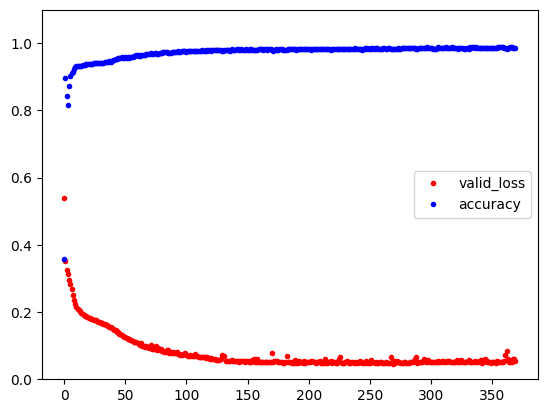

In [33]:
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3, label='valid_loss')
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3, label='accuracy')

plt.legend()
plt.ylim(0, 1.1)

plt.show()

### [실습] wine_test.csv => evaluate 해보기

In [34]:
df_test = pd.read_csv('../dataset/wine_test.csv', header=None)

print(df_test.shape)
df_test.head()

(1497, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,10.0,0.73,0.43,2.3,0.059,15.0,31.0,0.99660,3.15,0.57,11.0,5,1
1,8.2,0.68,0.30,2.1,0.047,17.0,138.0,0.99500,3.22,0.71,10.8,4,0
2,8.8,0.24,0.35,1.7,0.055,13.0,27.0,0.99394,3.14,0.59,11.3,7,1
3,7.0,0.24,0.34,1.4,0.031,27.0,107.0,0.99000,3.06,0.39,11.9,6,0
4,7.5,0.77,0.20,8.1,0.098,30.0,92.0,0.99892,3.20,0.58,9.2,5,1


In [41]:
dataset = df_test.values

X_test = dataset[:, 0:12]
y_test = dataset[:, 12]

In [42]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9800


[0.0550062470138073, 0.9799599051475525]

# 저장된 모델을 불러와서 평가해본다면?


In [38]:
import keras
model2 = keras.models.load_model("./model/01-0.5407.hdf5")
model2

In [43]:
model2.evaluate(X_test, y_test)

47/47 [==============================] - 0s 856us/step - loss: 0.5412 - accuracy: 0.8497


[0.5412479639053345, 0.8496993780136108]

In [44]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
